In [ ]:
import snntorch as snn
from snntorch import spikeplot as splt
from snntorch import spikegen

import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

ImportError: cannot import name 'plot_cur_mem_spk' from 'snntorch' (c:\Users\Mark\miniconda3\envs\whk-snn\lib\site-packages\snntorch\__init__.py)

In [6]:
num_steps = 100

In [20]:
def plot_spk_mem_spk(spk_in, mem, spk_rec, title):
    # Generate Plots
    fig, ax = plt.subplots(3, figsize=(8, 6), sharex=True,
                           gridspec_kw={'height_ratios': [0.4, 1, 0.4]})

    # Plot input spikes
    splt.raster(spk_in, ax[0], s=400, c="black", marker="|")
    ax[0].set_ylabel("Input Spikes")
    ax[0].set_title(title)
    ax[0].set_yticks([])

    # Plot membrane potential
    ax[1].plot(mem)
    ax[1].set_ylim([0, 1])
    ax[1].set_ylabel("Membrane Potential ($U_{mem}$)")
    ax[1].axhline(y=0.5, alpha=0.25, linestyle="dashed", c="black", linewidth=2)
    ax[1].set_xlabel("Time step")

    # Plot output spikes
    splt.raster(spk_rec, ax[2], s=400, c="black", marker="|")
    ax[2].set_ylabel("Output Spikes")
    ax[2].set_yticks([])

    plt.tight_layout()
    plt.show()

In [2]:
time_step = 1e-3
R = 5
C = 1e-3

# leaky integrate and fire neuron, tau=5e-3
lif1 = snn.Lapicque(R=R, C=C, time_step=time_step)

In [3]:
# Create the same neuron as before using snnTorch
lif2 = snn.Lapicque(R=5.1, C=5e-3, time_step=1e-3)

print(f"Membrane potential time constant: {lif2.R * lif2.C:.3f}s")

Membrane potential time constant: 0.025s


In [18]:
# Create a 1-D random spike train. Each element has a probability of 40% of firing.
spk_in = spikegen.rate_conv(torch.ones((num_steps,1)) * 0.40)

print(f"There are {int(sum(spk_in))} total spikes out of {len(spk_in)} time steps.")

There are 54 total spikes out of 100 time steps.


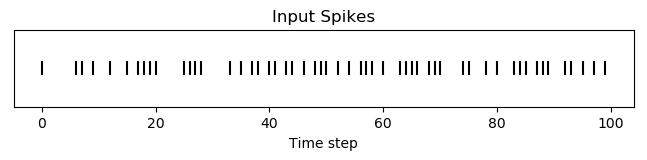

In [19]:
fig = plt.figure(facecolor="w", figsize=(8, 1))
ax = fig.add_subplot(111)

splt.raster(spk_in.reshape(num_steps, -1), ax, s=100, c="black", marker="|")
plt.title("Input Spikes")
plt.xlabel("Time step")
plt.yticks([])
plt.show()

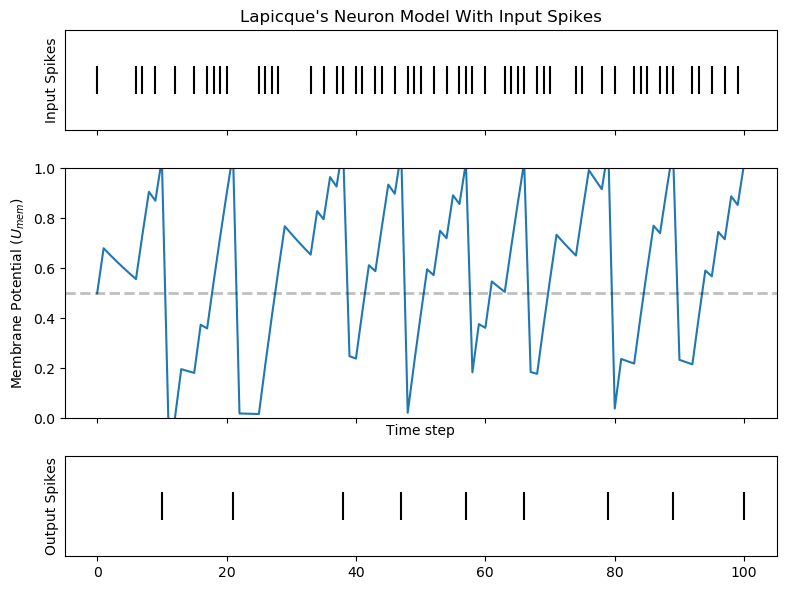

In [22]:
# Initialize inputs and outputs
mem = torch.ones(1)*0.5
spk_out = torch.zeros(1)
mem_rec = [mem]
spk_rec = [spk_out]

# Neuron simulation
for step in range(num_steps):
  spk_out, mem = lif2(spk_in[step], mem)
  spk_rec.append(spk_out)
  mem_rec.append(mem)

# convert lists to tensors
mem_rec = torch.stack(mem_rec)
spk_rec = torch.stack(spk_rec)

plot_spk_mem_spk(spk_in, mem_rec, spk_rec, "Lapicque's Neuron Model With Input Spikes")